In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('../data/wholesome_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

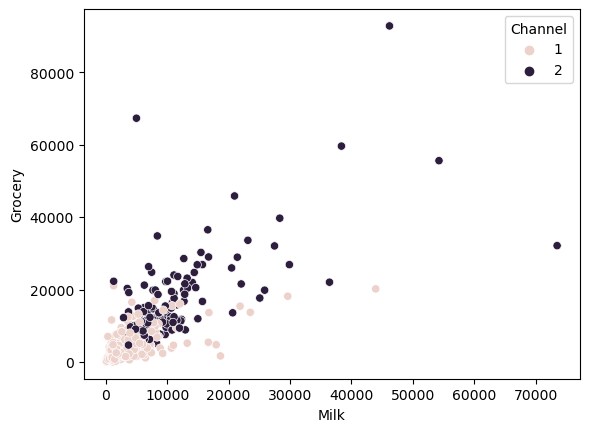

In [65]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')

<AxesSubplot:xlabel='Milk', ylabel='Count'>

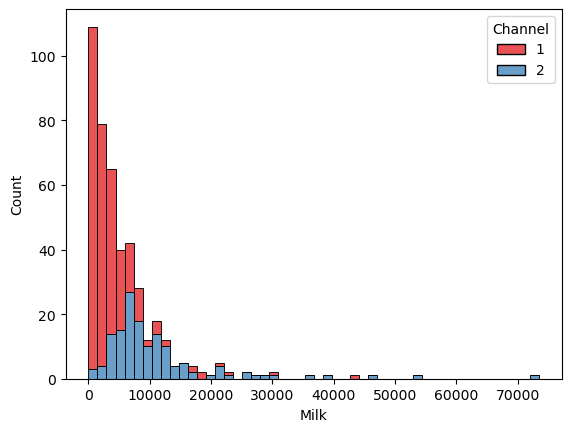

In [66]:
sns.histplot(data=df,x='Milk',hue='Channel',palette='Set1',multiple='stack')

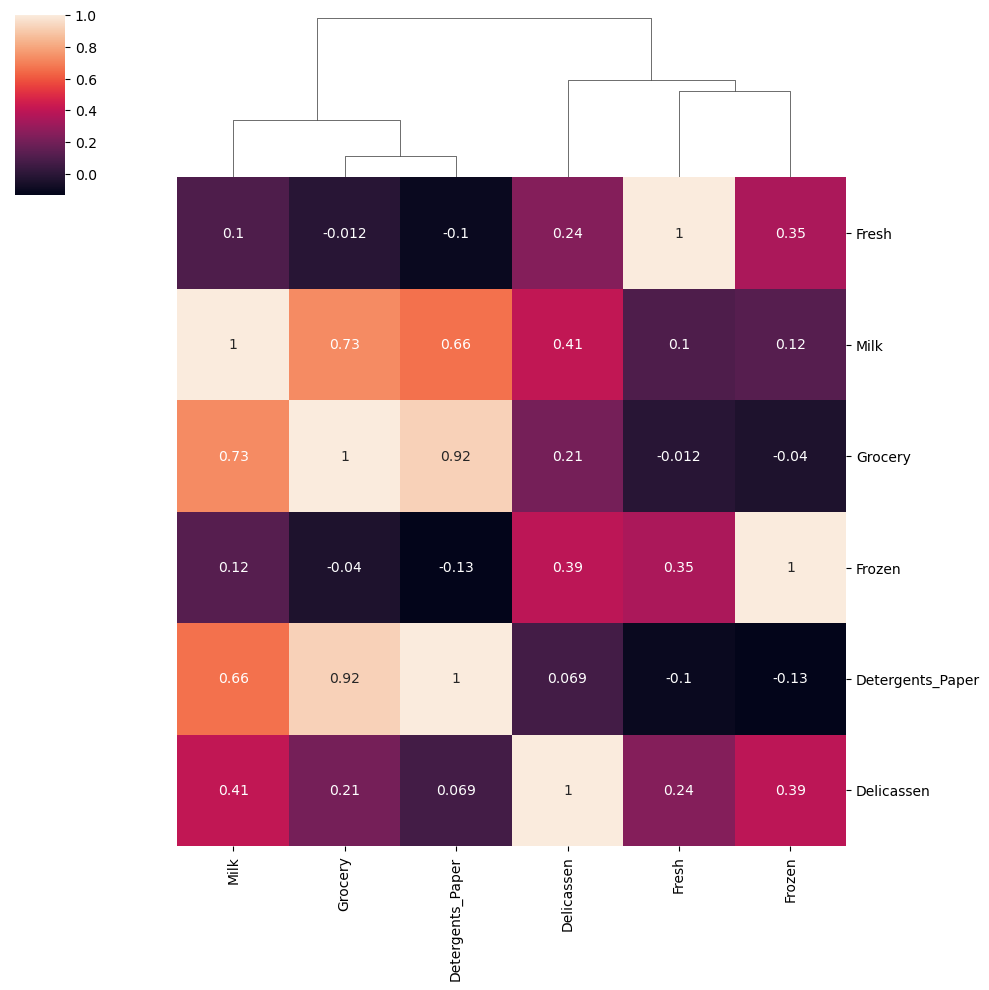

In [67]:
df_n = df.drop(labels=['Channel','Region'],axis=1)
sns.clustermap(df_n.corr(),annot=True,row_cluster=False)
#df_n.head()

In [68]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


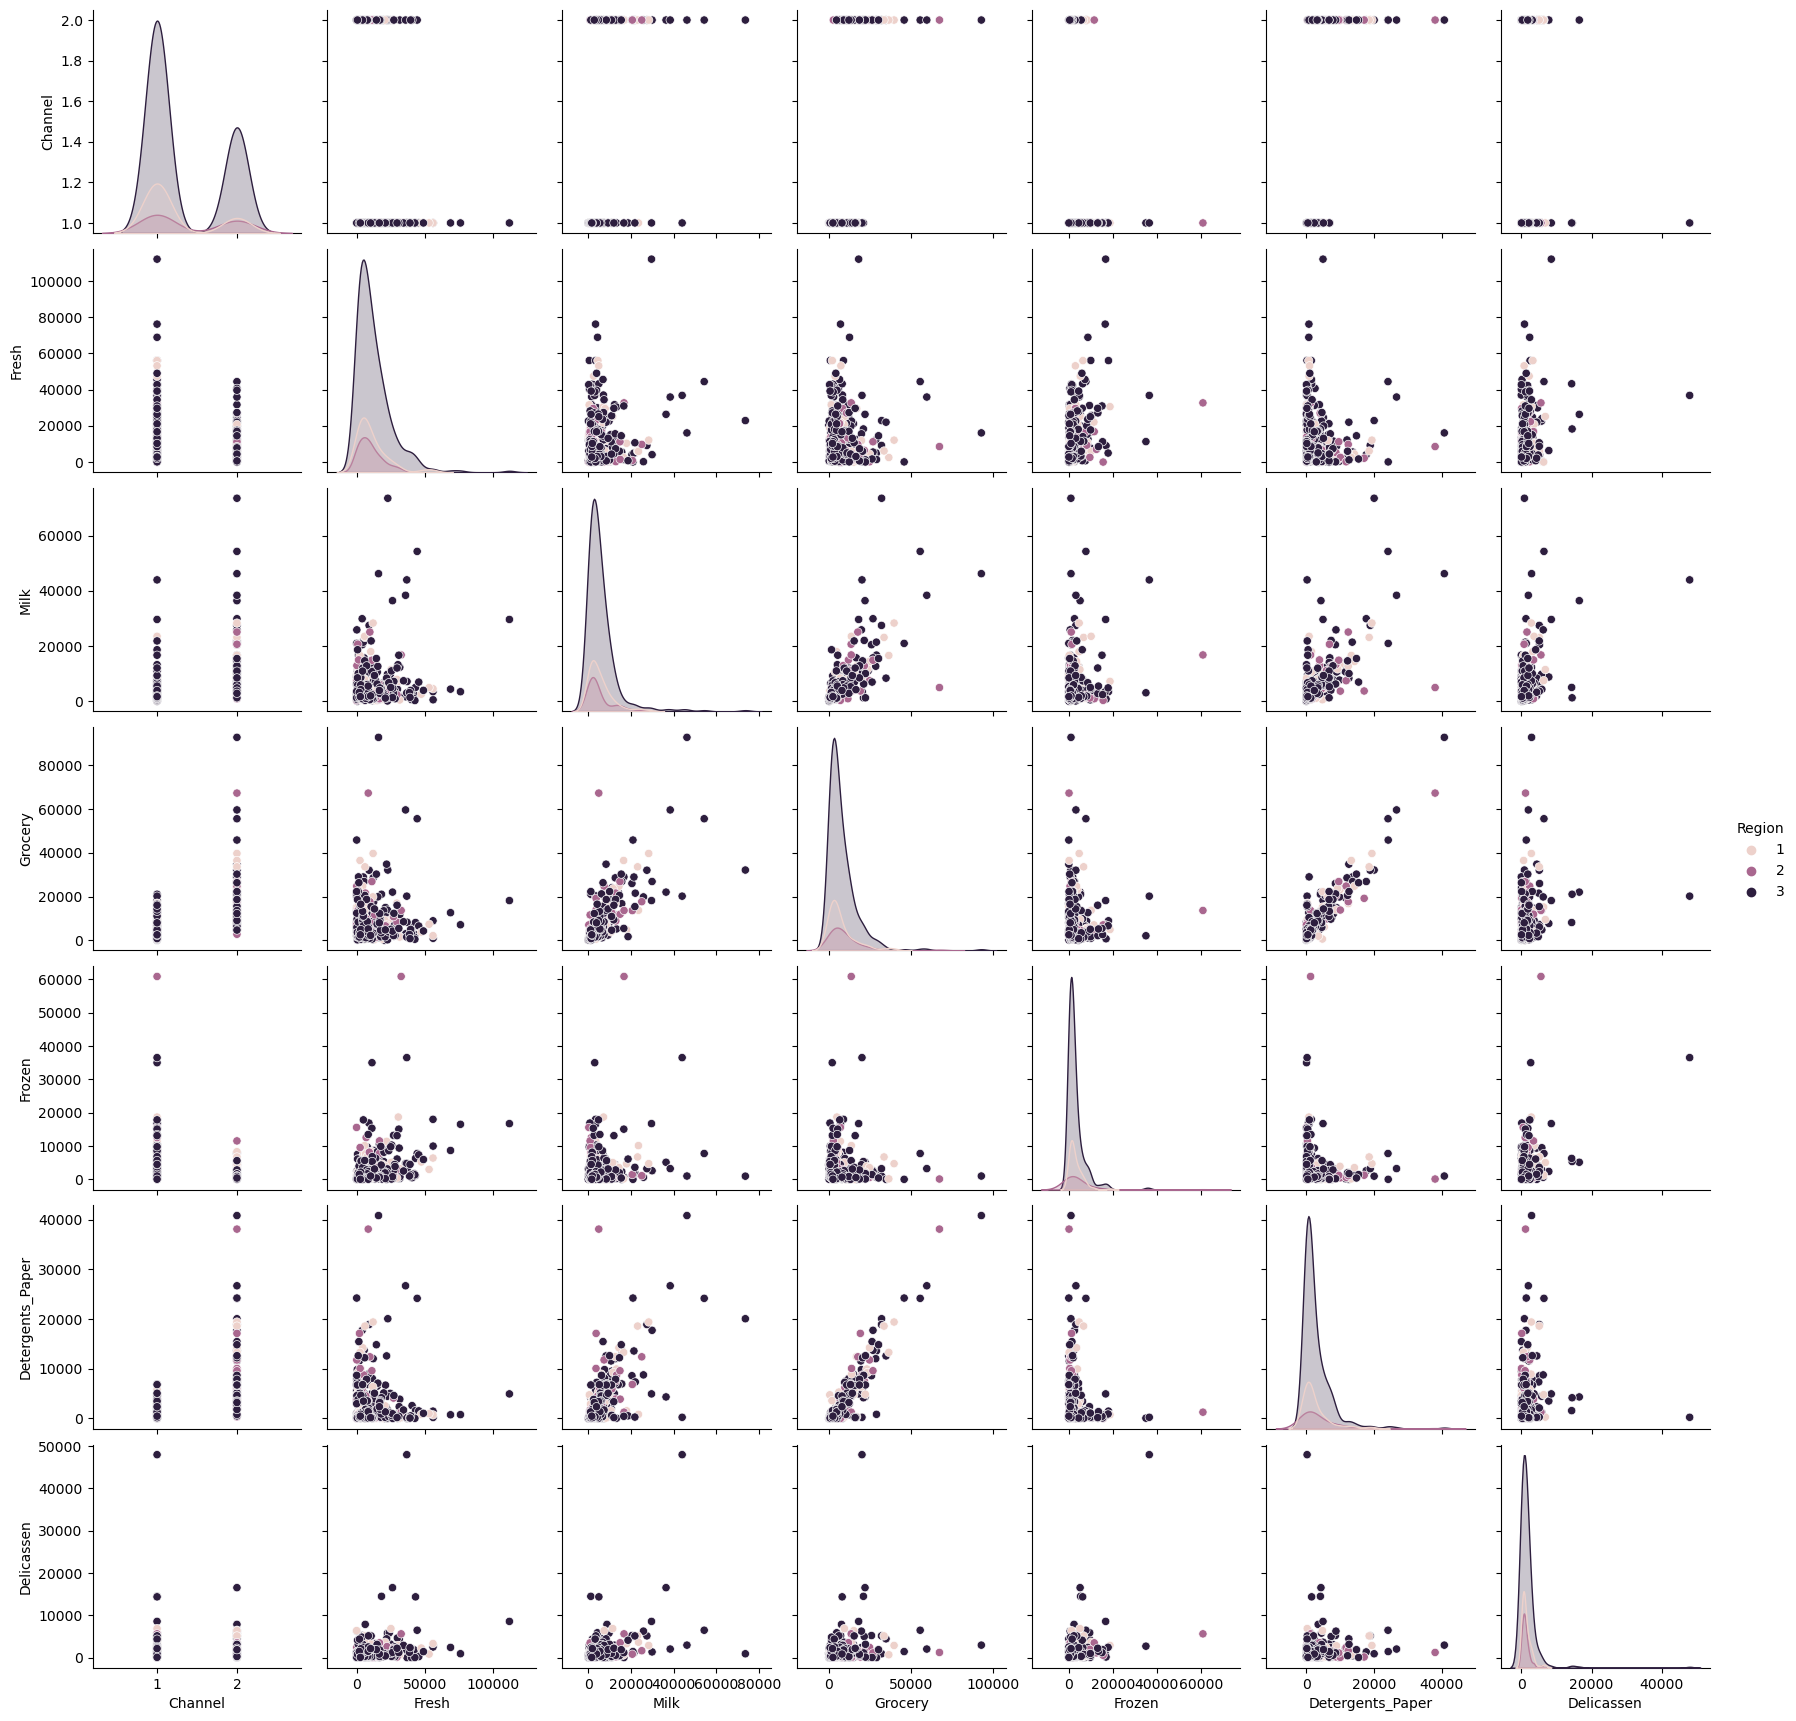

In [69]:
sns.pairplot(df,hue='Region')

In [70]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [71]:
from sklearn.cluster import DBSCAN
outlier_percentage = []
no_of_outlier = []

for eps in np.linspace(0.001,3,50):
    model = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    model.fit(scaled_X)
    no_of_outlier.append(np.sum(np.sum(model.labels_ == -1)))
    outlier_percentage.append(100 * np.sum(model.labels_ == -1)/len(model.labels_))

<AxesSubplot:>

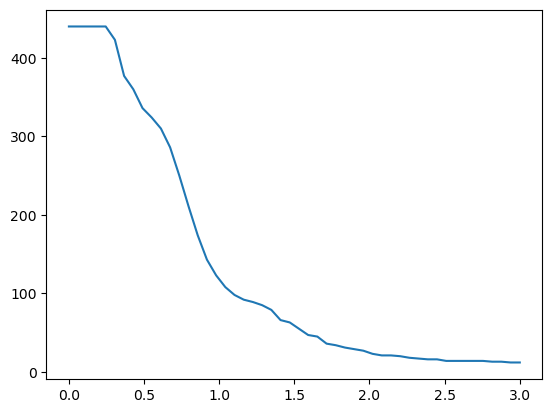

In [72]:
sns.lineplot(x=np.linspace(0.001,3,50),y=no_of_outlier)

Text(0, 0.5, 'Percentage Of Points Classified as Outliers')

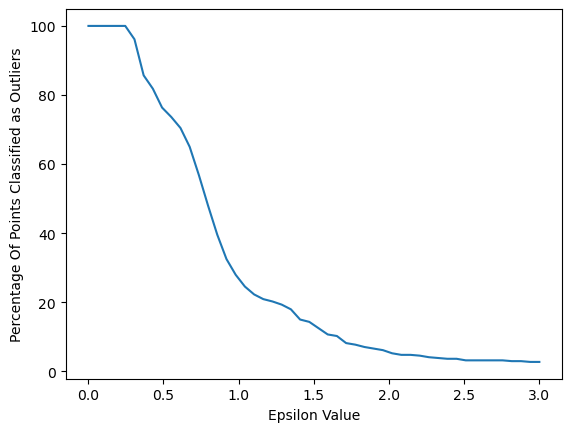

In [73]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percentage)
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage Of Points Classified as Outliers')

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

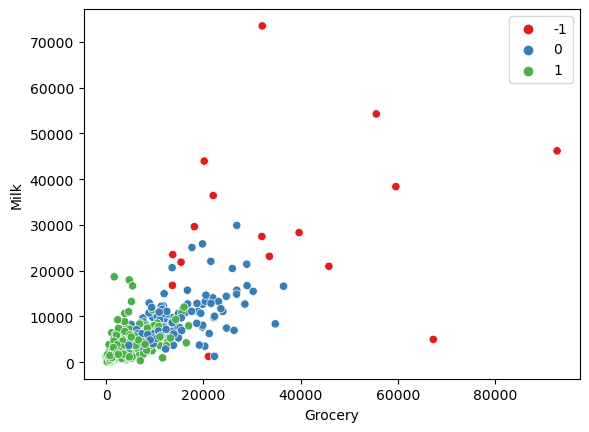

In [74]:
model = DBSCAN(eps=2,min_samples=scaled_X.shape[1])
model.fit(scaled_X)
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=model.labels_,palette='Set1')

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

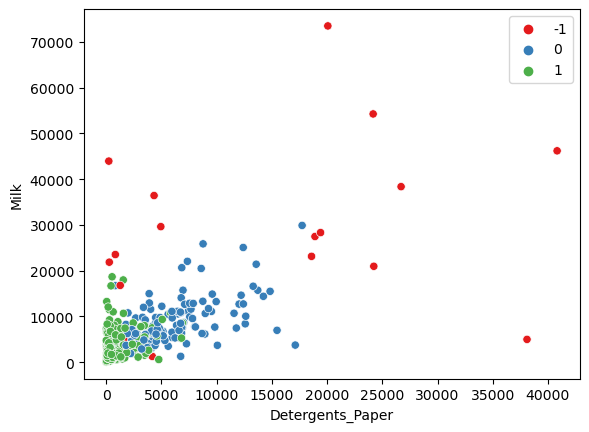

In [75]:
sns.scatterplot(data=df,x='Detergents_Paper',y='Milk',hue=model.labels_,palette='Set1')

In [76]:
df['Labels'] = model.labels_
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [44]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,0.622727
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.559394
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,-1.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,0.000000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,1.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,1.000000


In [77]:
cats = df.drop(['Channel','Region'],axis=1)
cat_mean = cats.groupby('Labels').mean()
cat_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,28678.285714,24176.523810,28797.857143,11535.000000,11932.523810,7367.380952
0,8134.862595,8909.916031,14004.427481,1450.595420,6080.832061,1533.519084
1,12542.430556,3039.760417,3677.871528,3192.315972,766.267361,1094.920139


<AxesSubplot:ylabel='Labels'>

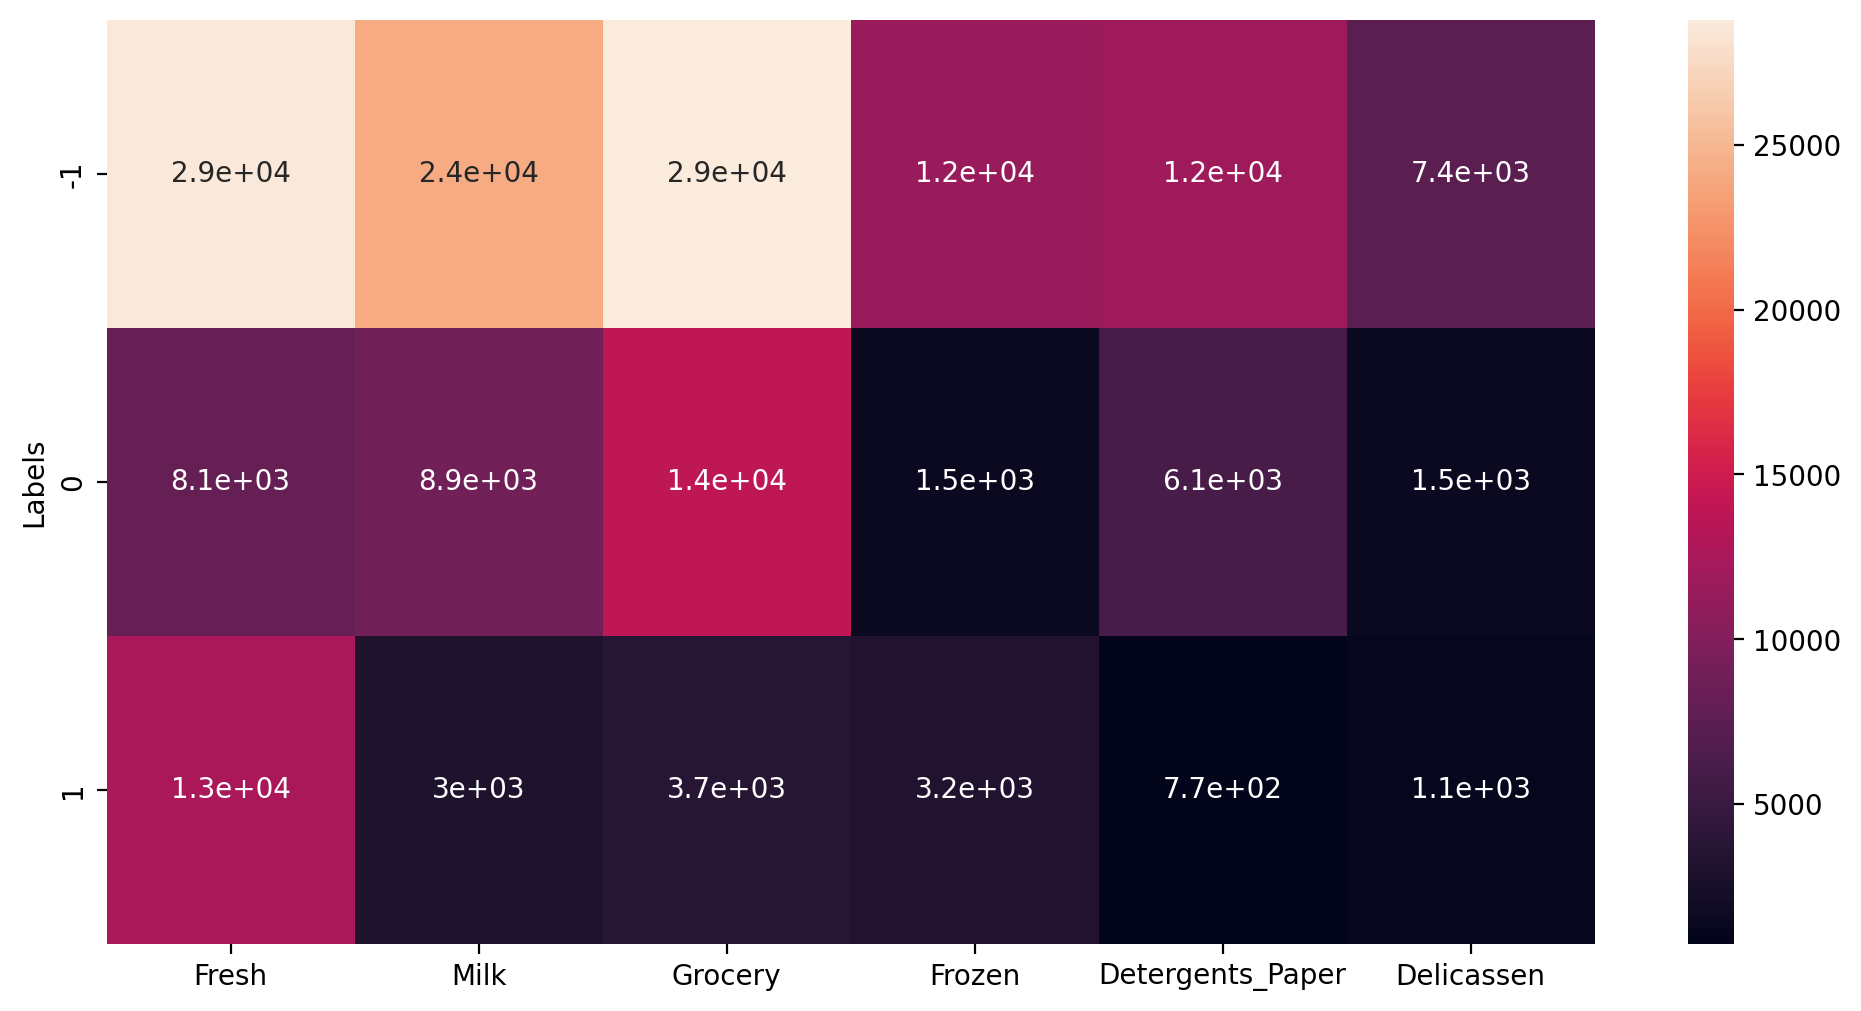

In [79]:
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(cat_mean,annot=True)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_cat_data = scaler.fit_transform(cat_mean)
df_cat = pd.DataFrame(scaled_cat_data,columns=cat_mean.columns)
df_cat

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.000000,0.277723,0.411089,0.000000,0.475949,0.069925
2,0.214549,0.000000,0.000000,0.172714,0.000000,0.000000
